# Advertising dataset:classify users that would mostly click on an ad using Logistic regression & Decision tree classifier

## Table of contents

* [Introduction](#Introduction)
* [Data_wrangling](#Data_wrangling)
* [Exploratory_Data_analysis](#Exploratory_Data_analysis)
* [Model_building](#Model_building)
* [Conclusions](#Conclusions)

## Introduction

## About Data

In this project we will be working with an advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
# Load data

df=pd.read_csv('advertising.csv')

## Data_wrangling

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


Data consists of 1000 rows and 10 columns with data types of floats, ints,objects with no null values

In [4]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
df.tail()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
999,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


In [6]:
#checking for duplicates

df[df.duplicated()]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad


In [7]:
#checking statistical insights

df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


checking for outiers in numerical columns

In [8]:
df.head(1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.9,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0


In [9]:
# this is a function that takes a column name and calculates its IQR and min outlier and max outlier

def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [10]:
outlier_treatment(df['Daily Time Spent on Site'])

(10.57875, 119.32875)

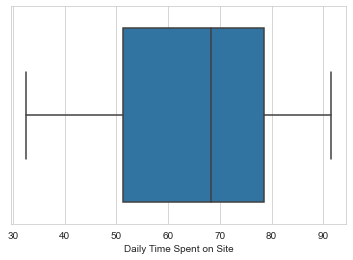

In [11]:
# drawing a boxplot to check for outliers visually

sns.boxplot(df['Daily Time Spent on Site']);

In [12]:
outlier_treatment(df['Area Income'])

(19373.553749999992, 93128.88375000001)

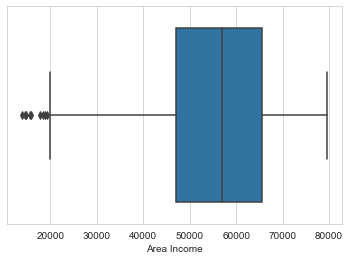

In [13]:
sns.boxplot(df['Area Income']);

As per the boxplot it seems that we have -ve outliers that needs to be eliminated to give a better accuracy in our model

In [14]:
outlier_treatment(df['Daily Internet Usage'])

(18.886250000000004, 338.73625000000004)

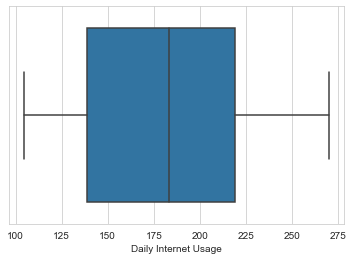

In [15]:
sns.boxplot(df['Daily Internet Usage']);

In [16]:
outlier_treatment(df['Age'])

(9.5, 61.5)

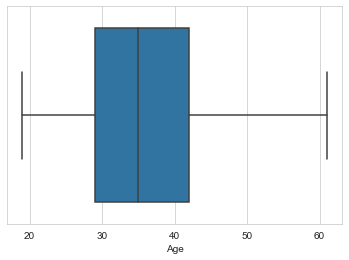

In [17]:
sns.boxplot(df['Age']);

In [18]:
#Removing -ve outliers from area income column

df=df[df['Area Income']>19300]

In [19]:
#checking for final reults

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  992 non-null    float64
 1   Age                       992 non-null    int64  
 2   Area Income               992 non-null    float64
 3   Daily Internet Usage      992 non-null    float64
 4   Ad Topic Line             992 non-null    object 
 5   City                      992 non-null    object 
 6   Male                      992 non-null    int64  
 7   Country                   992 non-null    object 
 8   Timestamp                 992 non-null    object 
 9   Clicked on Ad             992 non-null    int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 85.2+ KB


## Exploratory_Data_analysis

In [20]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000
mean,65.039788,35.982863,55312.807198,179.985040,0.478831,0.495968
std,15.901600,8.800784,13005.290554,44.031632,0.499804,0.500236
min,32.600000,19.000000,19345.360000,104.780000,0.000000,0.000000
25%,51.285000,29.000000,47332.817500,138.647500,0.000000,0.000000
50%,68.390000,35.000000,57228.185000,183.425000,0.000000,0.000000
75%,78.585000,42.000000,65518.960000,218.842500,1.000000,1.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.000000


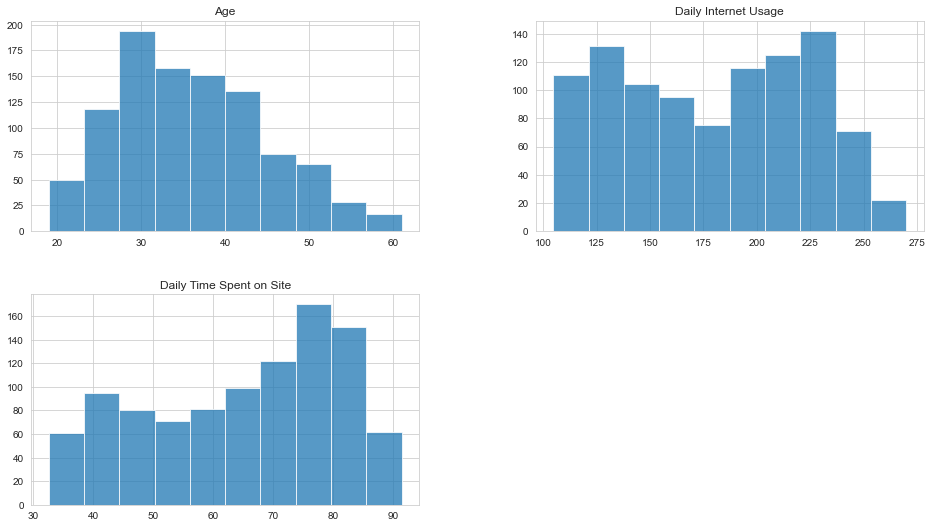

In [21]:
df.hist(['Daily Time Spent on Site','Age','Daily Internet Usage'],figsize=(16,24),layout=(5,2),alpha=0.75);

Observations:
* Age is concentrated more between the 30's
* Daily time spend on site is mostly 80 minutes
* Daiy Internet usage is usually mostly 225 minutes

In [22]:
# pearson correlation calcuation

df[['Age','Area Income']].corr()

,Age,Area Income
Age,1.000000,-0.180111
Area Income,-0.180111,1.000000


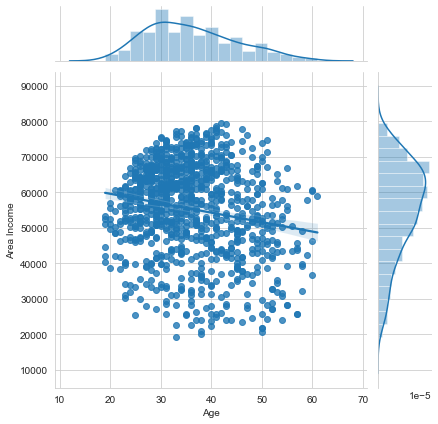

In [23]:
# plotting a joint plot to show relation visually

sns.jointplot(x='Age',y='Area Income',data=df,kind='reg');

As per the plot and the pearson correlation calculated of -0.18 , it seems that there is a -ve relation between Age and Area income as in the more the person gets old the less income he gets 

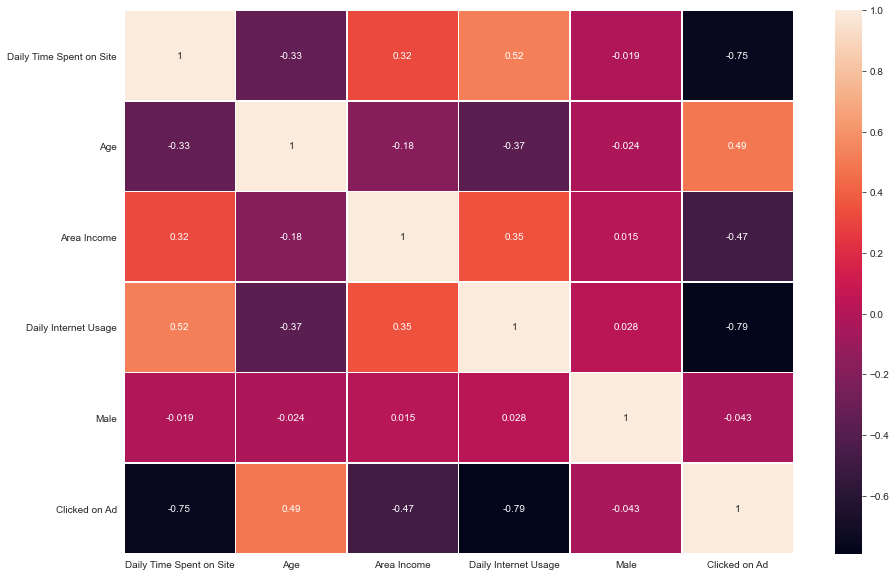

In [24]:
# Creating a heatmap to find correlations amond data
plt.figure(figsize=(15,10));
sns.heatmap(df.corr(),annot=True,linewidths=0.5);

Observations:

* Daily time spent on site and Daily internet used is moderally correlated(0.52)
* Age and click on AD are moderally correlated (0.49)

## Model_building

In [25]:
#checking columns i am going t include in my model

df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [26]:
# Preparing test data

x=df[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage','Male']]
x.head(1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.9,256.09,0


In [27]:
y=df['Clicked on Ad']

In [28]:
#Splitting data into train and test data

from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test,y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

##### Using Logistic Regression model

In [30]:
#importing the model

from sklearn.linear_model import LogisticRegression

In [31]:
logreg=LogisticRegression()

In [32]:
#fitting the model

logreg.fit(X_train,y_train)

LogisticRegression()

In [33]:
#testing the model

predictions=logreg.predict(X_test)

In [34]:
predictions

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0], dtype=i

In [35]:
y_test

36     1
851    1
724    0
839    1
408    1
      ..
168    1
538    0
875    1
956    1
305    1
Name: Clicked on Ad, Length: 298, dtype: int64

In [36]:
# Evaluating our model using calssification report

from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       146
           1       0.96      0.89      0.92       152

    accuracy                           0.92       298
   macro avg       0.92      0.92      0.92       298
weighted avg       0.93      0.92      0.92       298



In [38]:
from sklearn.metrics import confusion_matrix

Classification report shows that the accuracy of the model is 92% which is a very good result, precision which represents the percentage of the positive predictive value is 0.89% in (0) will not click , 96% in (1) will click , recall
which represents the percentage of relevant data found by the model in the dataset is 96% in (0) will not click , 89% in (1) will click

In [39]:
confusion_matrix(y_test,predictions)

array([[140,   6],
       [ 17, 135]], dtype=int64)

##### Using Descision Tree cassifier model

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dtree=DecisionTreeClassifier()

In [42]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [43]:
predictions_DT=dtree.predict(X_test)

In [44]:
print(classification_report(y_test,predictions_DT))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       146
           1       0.95      0.94      0.95       152

    accuracy                           0.95       298
   macro avg       0.95      0.95      0.95       298
weighted avg       0.95      0.95      0.95       298



In [45]:
print(confusion_matrix(y_test,predictions_DT))

[[139   7]
 [  9 143]]


## Conclusions

* Data frame has 1000 rows with 10 columns with no null values in any of the columns and its data types vary from float,int,objects
* Data had no null values nor duplicated rows
* There was some outliers in 'Area income' column which we removed them to enhance our model
* Daily time spent on site and Daily internet used is moderally correlated(0.52)
* Age and click on AD are moderally correlated (0.49)
* As per the plot and the pearson correlation calculated of -0.18 , it seems that there is a -ve relation between Age and Area income as in the more the person gets old the less income he gets
* Logistic Regression Classification report showed that the f1 score of the model is 92% which is a very good result
* Decision Tree Classifier Classification report showed that the f1 score of the model is 92% which is a very good result